# Colombian Constitution EDA.

Brief resume about the methodology and the results that we got.

## About the Document

The Political Constitution of the Republic of Colombia of 1991 is the Magna Carta of the Republic of Colombia. It was promulgated in the Constitutional Gazette number 114 of Thursday, July 4, 1991, and is also known as the Constitution of Human Rights. It replaced the Political Constitution of 1886 and was issued during the presidency of the liberal César Gaviria.1

## DS Pipeline



## Document Data Model

PowerPoint graph, meanwhile we can use the hierarchy of the articles dictionary

```
hierarchy = {
    'TITULO' : 'h1',
    'DISPOSICIONES' : 'h1',
    'CAPITULO' : 'h2',
    'ARTÍCULO' : 'p'

}
```

## EDA

### Libraries 

In [1]:
import numpy as np
import pandas as pd
import numpy as np
import pandas as pd
# For visualizations
import matplotlib.pyplot as plt
# For regular expressions
import re
# For handling string
import string
# For performing mathematical operations
import math
#import Dataset
df = pd.read_json('../constitucion_col_dict.json')

In [2]:
print("Shape of data=>",df.shape)
df.head(5)

Shape of data=> (439, 3)


,h1,h2,article
0,"{'head': 'TITULO I ', 'name': 'DE LOS PRINCIPI...","{'head': None, 'name': None}","{'name': 'Artículo 1', 'content': ['Artículo 1..."
1,"{'head': 'TITULO I ', 'name': 'DE LOS PRINCIPI...","{'head': None, 'name': None}","{'name': 'Artículo 2', 'content': ['Artículo 2..."
2,"{'head': 'TITULO I ', 'name': 'DE LOS PRINCIPI...","{'head': None, 'name': None}","{'name': 'Artículo 3', 'content': ['Artículo 3..."
3,"{'head': 'TITULO I ', 'name': 'DE LOS PRINCIPI...","{'head': None, 'name': None}","{'name': 'Artículo 4', 'content': ['Artículo 4..."
4,"{'head': 'TITULO I ', 'name': 'DE LOS PRINCIPI...","{'head': None, 'name': None}","{'name': 'Artículo 5', 'content': ['Artículo 5..."


### Dataset Cleaning

In [3]:
#Json format extraction
h1=df['h1'].apply(pd.Series)
h1.rename(columns={"head": "Titulos","name":"NombreTitulo"},inplace=True)
h2=df['h2'].apply(pd.Series)
h2.rename(columns={"head": "Capitulos","name":"NombreCapitulo"},inplace=True)
article=df['article'].apply(pd.Series)
article.rename(columns={"name": "Articulos","content":"Contenido"},inplace=True)
frames = [h1, h2, article]
df=pd.concat(frames, axis=1)
df.replace(r'\n','', regex=True,inplace=True) 
df['Contenido'] = df['Contenido'].str.join(',')

In [17]:
df.head()

,Titulos,Capitulos,Articulos,NombreTitulo,NombreCapitulo,Contenido,lemmatized
0,DISPOSICIONES TRANSITORIAS,CAPITULO 1,Artículo transitorio 1,None,None,convocase a elecciones generales del congreso ...,convocar elección general congreso republica c...
1,DISPOSICIONES TRANSITORIAS,CAPITULO 1,Artículo transitorio 10,None,None,los decretos que expida el gobierno en ejercic...,decreto expidar gobierno ejercicio facultad ot...
2,DISPOSICIONES TRANSITORIAS,CAPITULO 1,Artículo transitorio 11,None,None,las facultades extraordinarias a que se refier...,facultad extraordinario referir articulo trans...
3,DISPOSICIONES TRANSITORIAS,CAPITULO 1,Artículo transitorio 12,None,None,con el fin de facilitar la reincorporacion a l...,facilitar reincorporacion vida civil grupo gue...
4,DISPOSICIONES TRANSITORIAS,CAPITULO 1,Artículo transitorio 13,None,None,dentro de los tres anos siguientes a la entrad...,siguiente entrada vigencia constitucion gobie...


#### Sorting by  Title and chapters

In [5]:
df.set_index(['Titulos','Capitulos','Articulos'],inplace=True)
df.sort_index(inplace=True)

In [6]:
df.head()

NombreTitulo  \
Titulos                    Capitulos  Articulos                              
DISPOSICIONES TRANSITORIAS CAPITULO 1 Artículo transitorio 1          None   
                                      Artículo transitorio 10         None   
                                      Artículo transitorio 11         None   
                                      Artículo transitorio 12         None   
                                      Artículo transitorio 13         None   

                                                              NombreCapitulo  \
Titulos                    Capitulos  Articulos                                
DISPOSICIONES TRANSITORIAS CAPITULO 1 Artículo transitorio 1            None   
                                      Artículo transitorio 10           None   
                                      Artículo transitorio 11           None   
                                      Artículo transitorio 12           None   
                                      Artículo transitorio 13           None   

                                                                                                       Contenido  
Titulos                    Capitulos  Articulos                                                                   
DISPOSICIONES TRANSITORIAS CAPITULO 1 Artículo transitorio 1   Artículo transitorio 1. Convócase a elecciones...  
                                      Artículo transitorio 10  Artículo transitorio 10. Los decretos que expi...  
                                      Artículo transitorio 11  Artículo transitorio 11. Las facultades extrao...  
                                      Artículo transitorio 12  Artículo transitorio 12. Con el fin de facilit...  
                                      Artículo transitorio 13  Artículo transitorio 13. Dentro de los tres añ...

### Content cleaning

In [7]:
df.reset_index(inplace=True)

In [8]:
#Accent removing
df['Contenido'] = df['Contenido'].str.normalize('NFKD')\
       .str.encode('ascii', errors='ignore')\
       .str.decode('utf-8')

#Removing Articulo....
df['Contenido'].replace(r'[a-zA-Z\s]+\d+\.\s','', regex=True,inplace=True) 
df['Contenido'].replace(r'\n','', regex=True,inplace=True)
#lowerCase
df['Contenido'] = df['Contenido'].apply(lambda x:x.lower())
#digits Removal
df['Contenido'] = df['Contenido'].apply(lambda x: re.sub('\w*\d\w*','', x))

#Remove punctuations
df['Contenido'] = df['Contenido'].apply(lambda x: re.sub('[%s]' % re.escape(string.punctuation), '', x))
#Remove short Words
# df['Contenido'].replace(r'\b(\w{1,3})\b', '', regex=True, inplace=True)
#Remove extra spaces
df['Contenido'] = df['Contenido'].apply(lambda x: re.sub(' +',' ',x))


In [9]:
df['Contenido'].head()

0    convocase a elecciones generales del congreso ...
1    los decretos que expida el gobierno en ejercic...
2    las facultades extraordinarias a que se refier...
3    con el fin de facilitar la reincorporacion a l...
4    dentro de los tres anos siguientes a la entrad...
Name: Contenido, dtype: object

### NLP

In [10]:
import spacy
# "es_core_news_sm" the Spanish model installed for eficiency
nlp = spacy.load("es_core_news_sm")


#### Lemmatization
        Lemmatization, is an organized & step-by-step procedure of obtaining the root form of the word. It makes use of vocabulary (dictionary importance of words) and morphological analysis (word structure and grammar relations).

In [11]:
# Lemmatization with stopwords removal
df['lemmatized']=df['Contenido'].apply(lambda x: ' '.join([token.lemma_ for token in list(nlp(x)) if (token.is_stop==False)]))
# Filter for short words
df['lemmatized'].replace(r'\b(\w{1,3})\b', '', regex=True, inplace=True)
#Remove extra spaces
df['lemmatized'] = df['lemmatized'].apply(lambda x: re.sub(' +',' ',x))


In [12]:
# Join title and title name
for index, row in df.iterrows():
    if row['NombreTitulo'] != None:
        df['Titulos'][index] = df['Titulos'][index] + ' ' + df['NombreTitulo'][index]

In [13]:
df_grouped=df[['Titulos','lemmatized']].groupby(by='Titulos').agg(lambda x:' '.join(x))
df_grouped.head(14)

,lemmatized
Titulos,
DISPOSICIONES TRANSITORIAS,convocar elección general congreso republica c...
TITULO I DE LOS PRINCIPIOS FUNDAMENTALES,colombia social derecho organizado forma repub...
"TITULO II DE LOS DERECHOS, LAS GARANTIAS Y LOS DEBERES",derecho vida inviolable habrar pena muerte som...
TITULO III DE LOS HABITANTES Y DEL TERRITORIO,nacional colombiano nacimientoa natural colomb...
TITULO IV DE LA PARTICIPACION DEMOCRATICA Y DE LOS PARTIDOS POLITICOS,mecanismo participacion pueblo ejercicio sober...
TITULO IX DE LAS ELECCIONES Y DE LA ORGANIZACION ELECTORAL,voto derecho deber ciudadano elección ciudadan...
TITULO V DE LA ORGANIZACION DEL ESTADO,rama publico legislativa ejecutiva judicialade...
TITULO VI DE LA RAMA LEGISLATIVA,senador representante seran elegido periodo in...
TITULO VII DE LA RAMA EJECUTIVA,presidente republica simbolizar unidad naciona...


#### Term Matrix
    Bag of Words (BoW) Model
    The Bag of Words (BoW) model is the simplest form of text representation in numbers. Like the term itself, we can represent a sentence as a bag of words vector (a string of numbers).

In [15]:
# Creating Document Term Matrix
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(analyzer='word')
data=cv.fit_transform(df_grouped['lemmatized'])
df_dtm = pd.DataFrame(data.toarray(), columns=cv.get_feature_names())
df_dtm.index=df_grouped.index
df_dtm.head()

,abandono,abierto,abogado,abogar,abrir,abrirar,absoluto,abstener,abusar,abuso,...,votante,votar,voto,votosen,vuelta,vulnerable,vulnerado,yuno,zona,zonasel
Titulos,,,,,,,,,,,,,,,,,,,,,
DISPOSICIONES TRANSITORIAS,0,0,0,0,0,1,1,0,0,0,...,0,0,1,0,0,1,0,1,4,1
TITULO I DE LOS PRINCIPIOS FUNDAMENTALES,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"TITULO II DE LOS DERECHOS, LAS GARANTIAS Y LOS DEBERES",1,0,1,0,0,0,1,1,1,2,...,0,0,1,0,0,0,2,0,1,0
TITULO III DE LOS HABITANTES Y DEL TERRITORIO,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,2,0
TITULO IV DE LA PARTICIPACION DEMOCRATICA Y DE LOS PARTIDOS POLITICOS,0,1,0,0,0,0,0,0,0,0,...,0,0,4,0,0,0,0,0,0,0


In [ ]:
# https://www.analyticsvidhya.com/blog/2020/02/quick-introduction-bag-of-words-bow-tf-idf/

### Visualization
#### Word cloud
        Word clouds are the visual representations of the frequency of different words present in a document. It gives importance to the more frequent words which are bigger in size compared to other less frequent words.

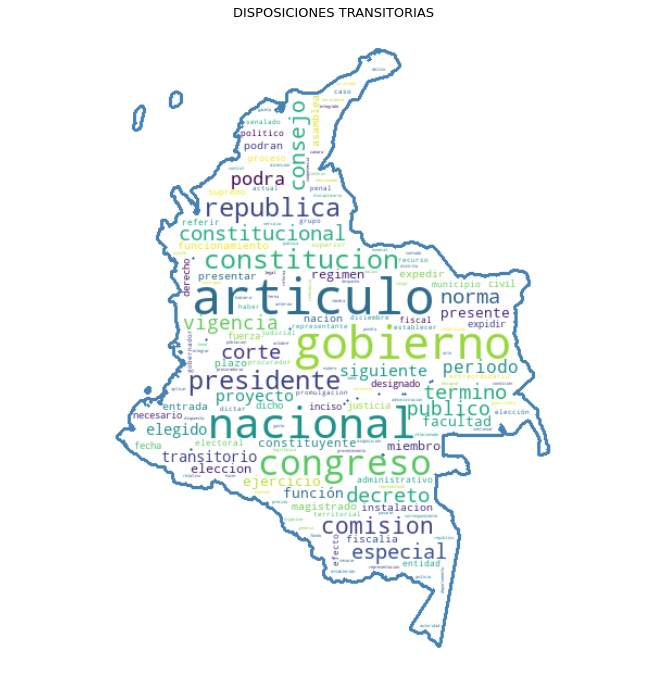

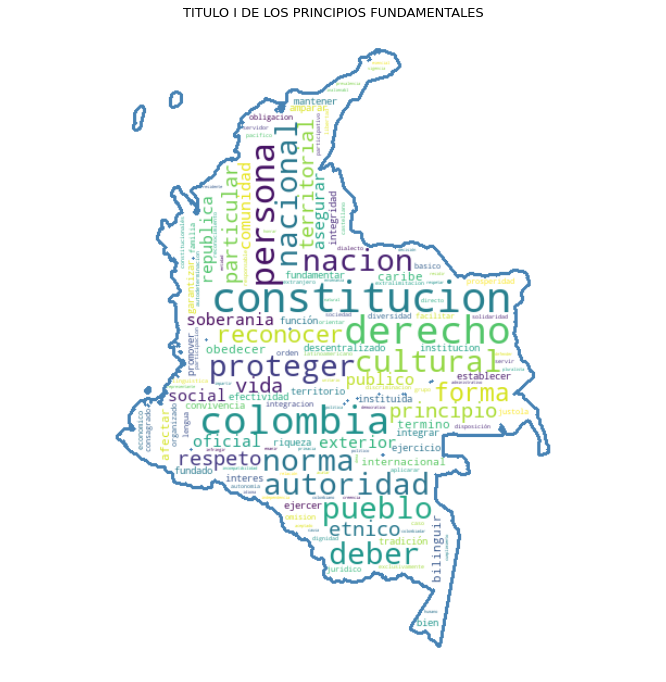

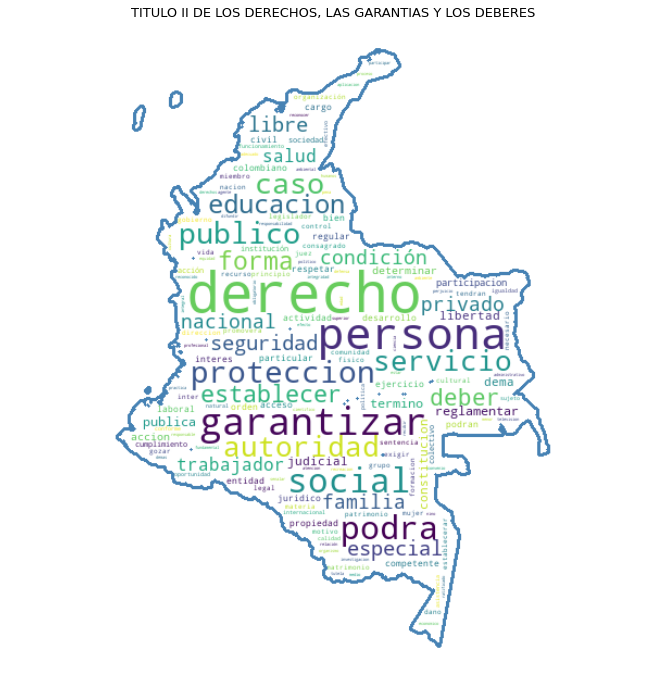

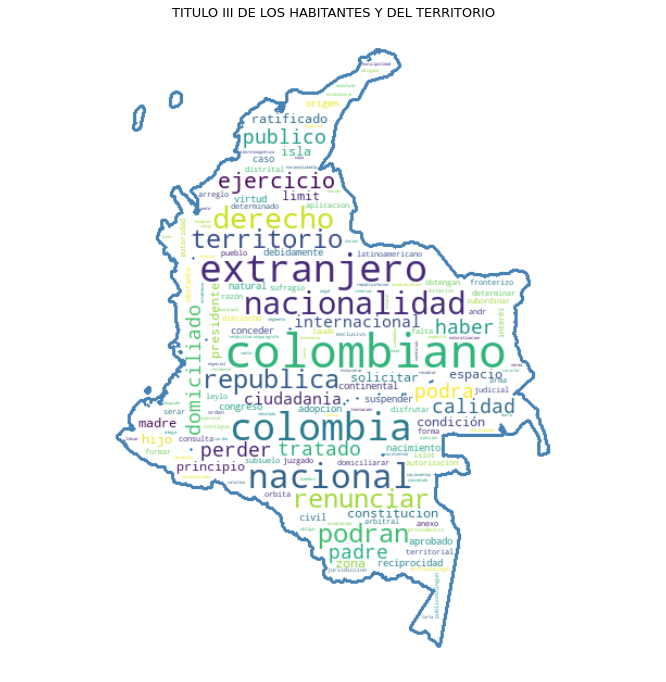

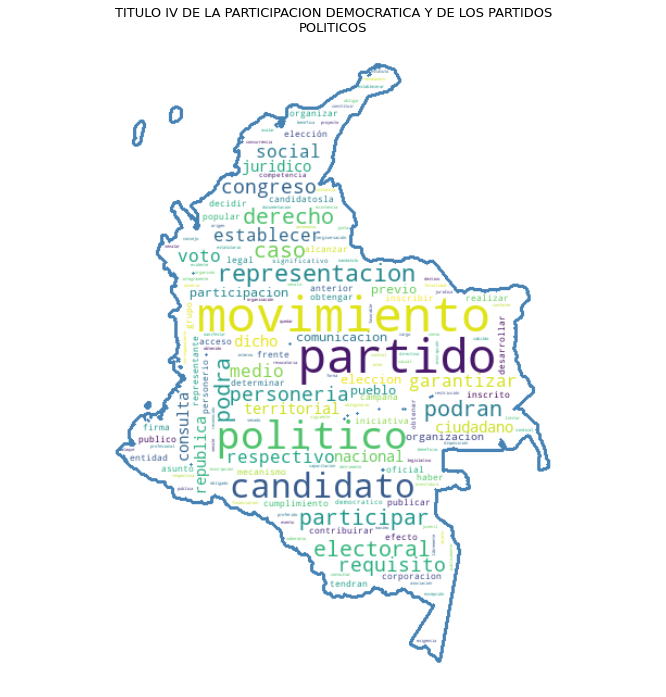

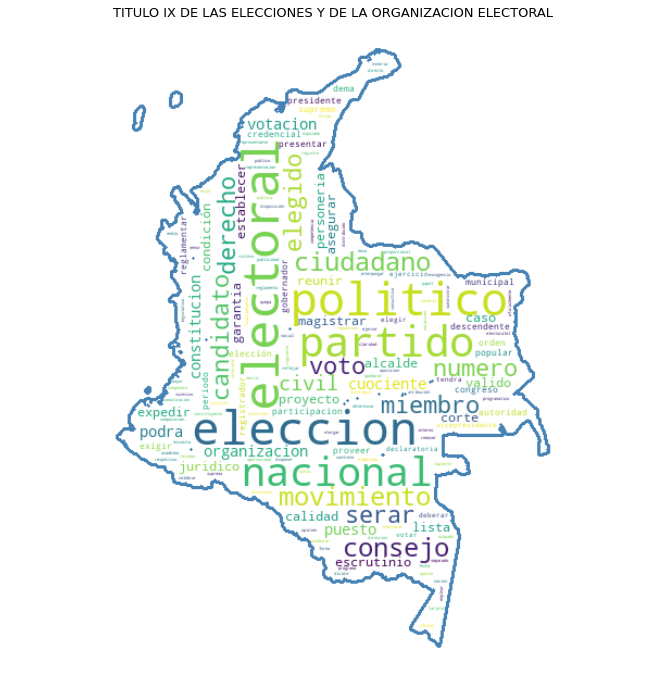

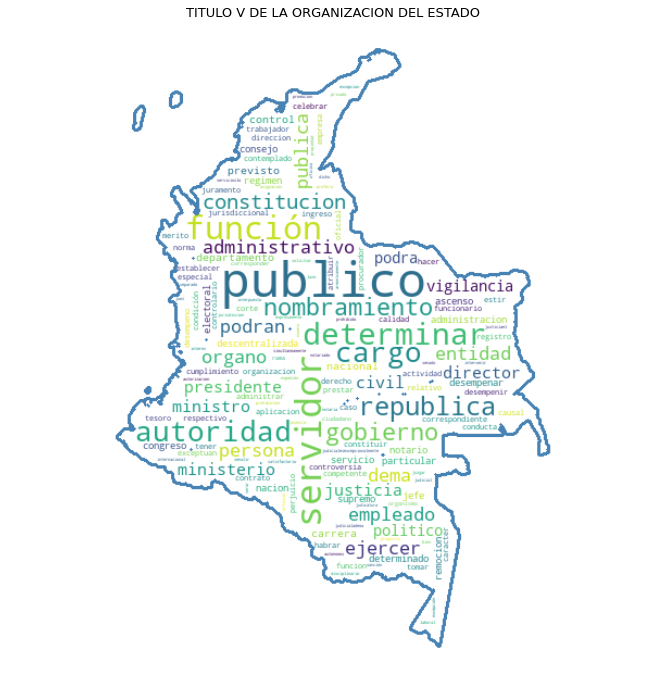

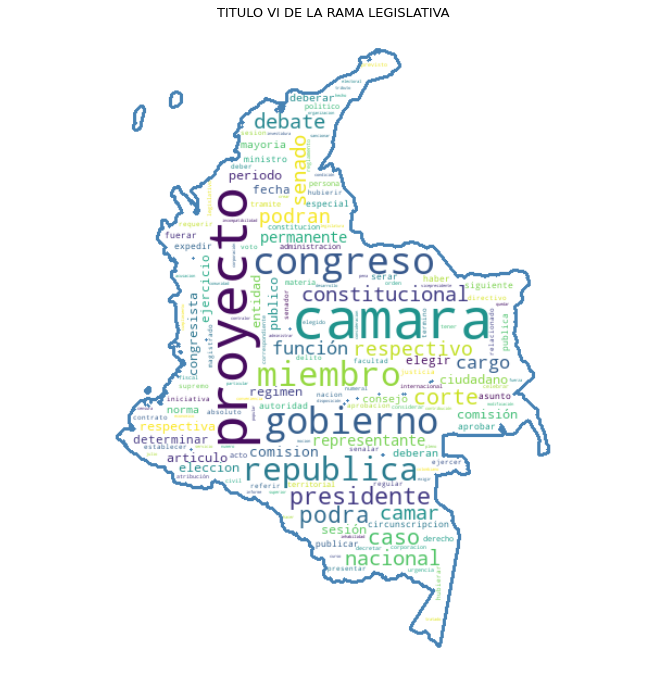

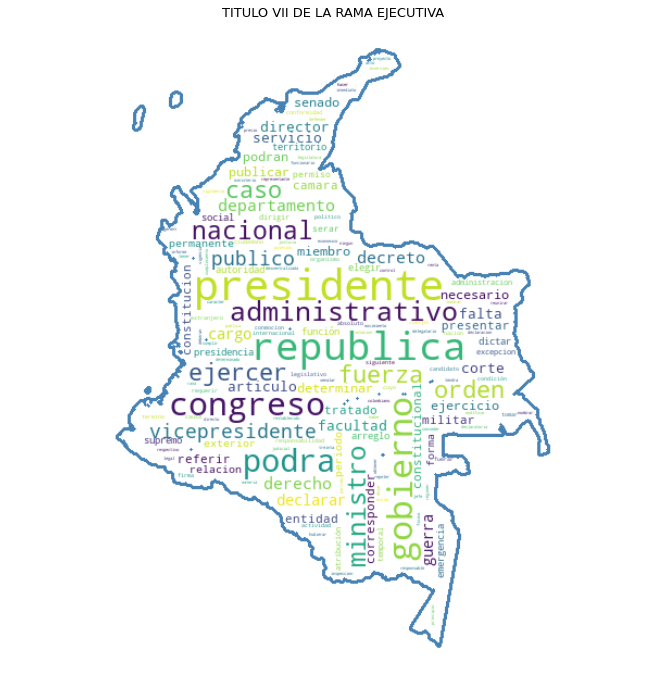

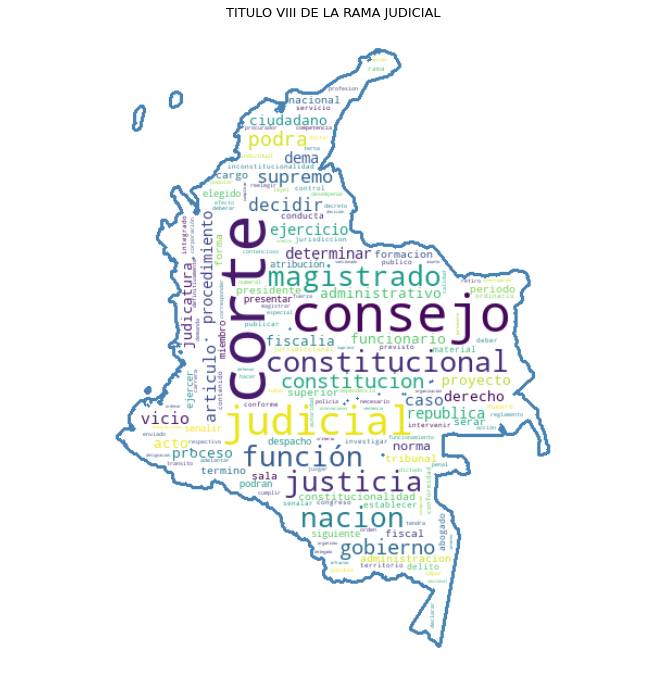

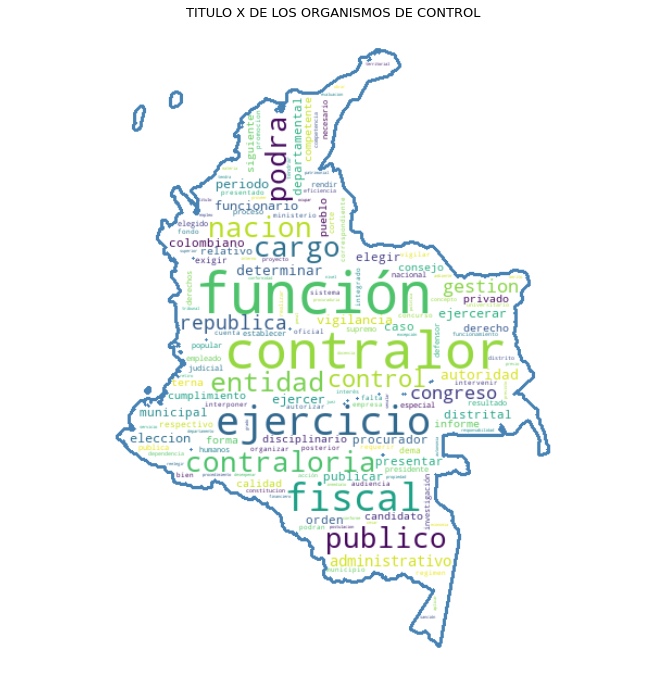

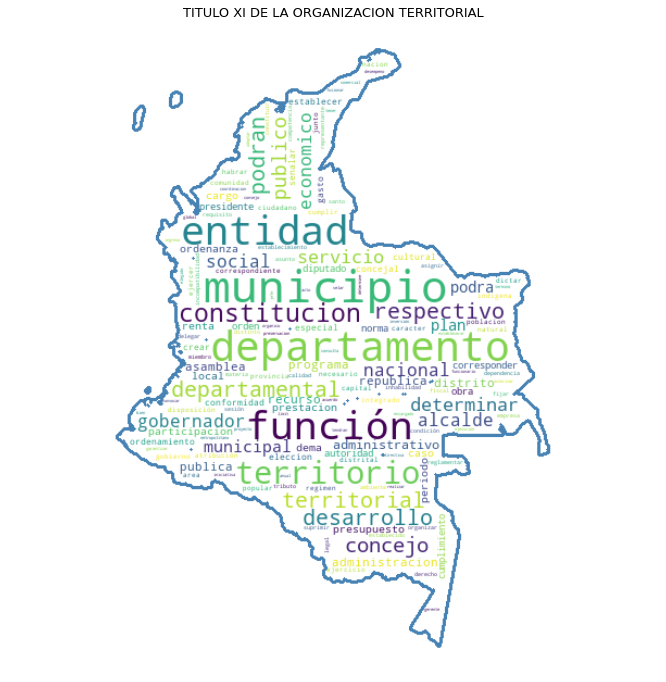

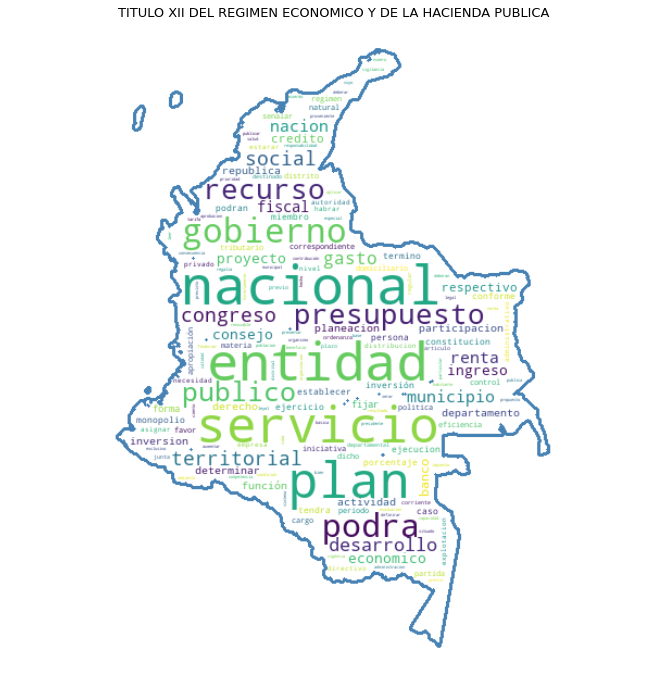

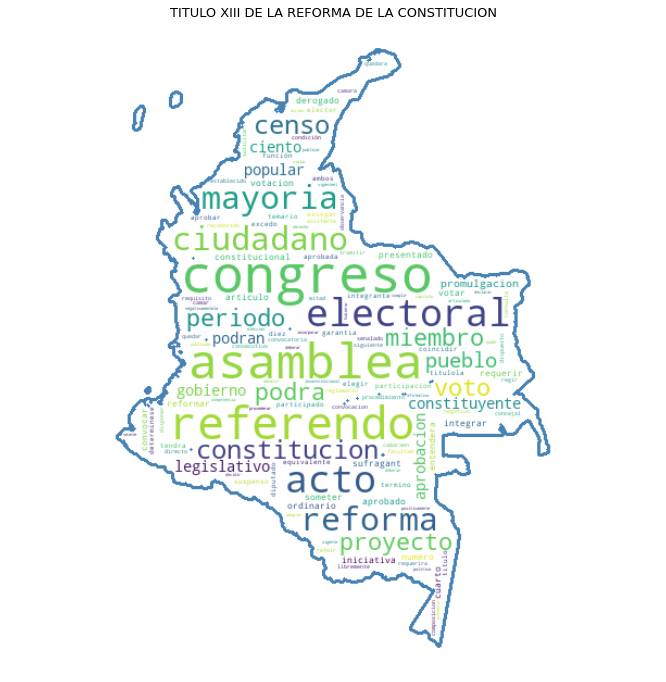

In [16]:
# Importing wordcloud for plotting word clouds and textwrap for wrapping longer text
from wordcloud import WordCloud
from textwrap import wrap
from PIL import Image

mapa = np.array(Image.open('./images/map.png'))
# Function for generating word clouds
def generate_wordcloud(data,title):
  wc = WordCloud(width=800, height=660,background_color="white", max_words=150,mask=mapa, contour_width=2, contour_color='steelblue').generate_from_frequencies(data)
  
  plt.figure(figsize=(15,12))
  plt.imshow(wc, interpolation='bilinear')
  plt.axis("off")
  plt.title('\n'.join(wrap(title,60)),fontsize=13)
  plt.show()
  
# Transposing document term matrix
df_dtm=df_dtm.transpose()

# Plotting word cloud for each title
for index,Titulo in enumerate(df_dtm.columns):
  generate_wordcloud(df_dtm[Titulo].sort_values(ascending=False),Titulo)

## Tree plot

In [ ]:
from treelib import Node, Tree
tree = Tree() #Tree initialization
df.reset_index(inplace=True)


In [ ]:
# Index creation for coming organization

for index, row in df.iterrows():
    if row['NombreCapitulo'] == None:
        df['NombreCapitulo'][index] = f"{df['Titulos'][index],df['Capitulos'][index]}"


df=df.assign(idT = (df['Titulos']).astype('category').cat.codes)
df=df.assign(idC = (df['Titulos'] + '_' +df['NombreCapitulo']).astype('category').cat.codes)
df['idA'] = range(len(df))

In [ ]:
df.head()

In [ ]:
# Tree root.
tree.create_node("Constitucion","Cons") #root

In [ ]:
#Node and Child creation
for index, row in df.iterrows():
    if not tree.contains((f"Tit{row['idT']}")):
        tree.create_node(row['Titulos'],(f"Tit{row['idT']}"), parent='Cons')
    if not tree.contains((f"Cap{row['idC']}")):
        tree.create_node(row['Capitulos'],(f"Cap{row['idC']}"),parent=(f"Tit{row['idT']}"))
    if not tree.contains((f"Art{row['idA']}")):
        tree.create_node(row['Articulos'],(f"Art{row['idA']}"),parent=(f"Cap{row['idC']}"))

In [ ]:
tree.show()

### Tree visualization (pending)

In [ ]:
# dot = tree.to_graphviz(filename='Constitucion.gv')

In [ ]:

# from graphviz import Source
# dot = Source.from_file('Constitucion.gv')

In [ ]:
# dot.render('Constitucion.gv', view=True)  

# Funcion que cuente h1, h2 y articulos

### 2) Number of paragraphs

### 3) Number of words

### 4) Lematizacion y que pasa despues

### 5) Most frequent relevant words

## TFIDF / NMF / LDA